In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from collections import Counter
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
import sys
from pathlib import Path

project_root = Path.cwd().parent    
sys.path.append(str(project_root.resolve()))   # now Python can find modules there

import data_preparation   # regular import works

## Import data and transform

In [3]:
df_raw = pd.read_csv("../../Data/Refined/9019/asthma_prevalence_rate.csv")
df_raw

,Measure,Country Name,Disease,Metric,Year,Value,Country Code,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),...,Oil consumption,u10,v10,d2m,t2m,sst,sp,skt,blh,PM2.5 pollution
0,Prevalence,Japan,Asthma,Rate,1990,5082.997034,JPN,..,100,9.4496485203842,...,1.97956,1.741828,1.021044,288.076401,292.252000,293.810320,102094.635435,293.628495,885.064589,13.37278
1,Prevalence,Japan,Asthma,Rate,1991,5092.603580,JPN,..,100,9.49356587396341,...,2.00120,2.286313,1.311337,288.337128,292.431930,293.870958,101983.583177,293.695755,892.493795,13.29348
2,Prevalence,Japan,Asthma,Rate,1992,5091.760356,JPN,..,100,9.49874382157927,...,2.04296,2.025161,1.717294,288.129279,292.314792,293.702229,102020.582682,293.530340,909.754829,13.22620
3,Prevalence,Japan,Asthma,Rate,1993,5081.664145,JPN,..,100,9.41083802642014,...,1.99111,1.625297,1.286398,287.874186,292.176917,293.652769,102097.751613,293.474290,902.488291,13.17147
4,Prevalence,Japan,Asthma,Rate,1994,5064.407124,JPN,..,100,9.80971896020067,...,2.10148,2.570448,1.109048,288.097394,292.441165,293.978702,102064.984418,293.796735,911.037764,13.12983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,Prevalence,Sudan,Asthma,Rate,2017,4825.147679,SDN,54.1,53,0.554132847201123,...,NaN,-6.390120,-2.174717,294.064998,298.129478,298.260798,101349.605304,299.081299,828.716632,59.81684
4946,Prevalence,Sudan,Asthma,Rate,2018,4814.203984,SDN,56.25,55.3,0.539979158318373,...,NaN,-6.720369,-1.962978,294.571177,298.391357,298.527902,101285.615172,299.362520,809.267977,58.69366
4947,Prevalence,Sudan,Asthma,Rate,2019,4803.510151,SDN,58.9,57.6,0.515394963684055,...,NaN,-6.393558,-1.910857,294.429075,298.369937,298.543588,101300.024220,299.369651,819.350147,51.93562
4948,Prevalence,Sudan,Asthma,Rate,2020,4800.033188,SDN,61,59.7,0.456248148211711,...,NaN,-7.191453,-2.245633,293.988485,297.929028,298.007299,101402.090968,298.836881,847.942231,45.83490


In [5]:
df_raw.columns

Index(['Measure', 'Country Name', 'Disease', 'Metric', 'Year', 'Value',
       'Country Code',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to electricity (% of population)',
       'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
       'Compulsory education, duration (years)', 'GDP (current US$)',
       'GDP per capita (constant 2015 US$)', 'Gini index',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)',
       'People using at least basic sanitation services (% of population)',
       'Population, total',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'Renewable electricity output (% of total electricity output)',
       'Surface area (sq. km)',
       'Unemployment, total (% of total labor force) (national estimate)',
       'CO2 emissions', 'Coal consumption', 'Energy use', 'Electricity use',
       'Raw materi

In [6]:
columns_to_keep = [col for col in df_raw.columns if col not in ['Country Name', 'Measure', 'Metric', 'Disease']]
df_excluded = df_raw[columns_to_keep]

In [7]:
df_prepared = data_preparation.preprocessing(df_excluded)

In [8]:
df_imputed = data_preparation.impute_nans(df_prepared)
df_imputed

📊 Colonnes détectées pour l'imputation : 31 colonnes
test


C:\Users\rapso\OneDrive - HESSO\HEIG\GML\GML_RespiratoryDiseases\data_preparation.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda g: g.ffill().bfill())


,Year,Value,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),"Compulsory education, duration (years)",GDP (current US$),GDP per capita (constant 2015 US$),Gini index,"Life expectancy at birth, total (years)",...,Country Code_URY,Country Code_USA,Country Code_UZB,Country Code_VEN,Country Code_VNM,Country Code_VUT,Country Code_YEM,Country Code_ZAF,Country Code_ZMB,Country Code_ZWE
3192,1990.0,5036.145645,5.5,4.4,0.242594,6.0,3.521418e+09,308.318270,45.989731,45.118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3193,1991.0,5039.093665,5.5,4.4,0.232619,6.0,3.521418e+09,308.318270,45.948539,45.521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3194,1992.0,5039.644898,5.5,4.4,0.137051,6.0,3.521418e+09,308.318270,45.480208,46.569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3195,1993.0,4930.052845,5.5,4.4,0.119439,6.0,3.521418e+09,308.318270,45.431074,51.021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3196,1994.0,4797.861343,5.5,4.4,0.103700,6.0,3.521418e+09,308.318270,46.118523,50.969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,2017.0,2711.324736,30.1,44.0,0.714627,7.0,5.107473e+10,1422.193460,44.300000,60.263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4436,2018.0,2717.755086,30.3,45.4,0.816126,7.0,3.415606e+10,1471.394890,44.300000,60.906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4437,2019.0,2724.218125,30.3,46.7,0.731382,7.0,2.571566e+10,1356.838211,50.300000,61.060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4438,2020.0,2731.155434,30.5,52.7,0.584283,7.0,2.686856e+10,1230.191557,50.300000,61.530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Time Series with LSTM

HistGradientBoostingRegressor (from sklearn.ensemble) is a tree-based model. Tree-based models split data based on thresholds, not on absolute magnitudes, so scaling does not affect them.
Therefore we can avoid to normalize our features.

In [38]:
def country_kfold_splits(countries, k=5, random_state=None):
    """
    Generate train/test splits by countries for K-fold CV.
    Returns a list of tuples: (train_countries, test_countries)
    """
    countries = np.array(countries)
    if random_state is not None:
        np.random.seed(random_state)
    np.random.shuffle(countries)
    
    folds = np.array_split(countries, k)  # split into k roughly equal folds
    
    splits = []
    for i in range(k):
        test_countries = folds[i]
        train_countries = np.hstack([folds[j] for j in range(k) if j != i])
        splits.append((train_countries, test_countries))
    return splits


Here the LSTM Model Builder:

In [ ]:
def build_lstm_reg(input_shape, hidden_units=[64,32], dropout=0.2, l2=1e-4):
    inp = layers.Input(shape=input_shape)
    x = layers.Masking(mask_value=0.0)(inp)
    for h in hidden_units:
        x = layers.LSTM(h, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(l2))(x)
        x = layers.Dropout(dropout)(x)
    x = layers.LSTM(hidden_units[-1], return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(l2))(x)
    out = layers.Dense(1, activation='linear')(x)
    model = models.Model(inp, out)
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
    return model

In [ ]:
# Prepare sequences per country
def create_country_sequences(df, feature_columns, target_column, sequence_length=3):
    """
    Converts a dataframe into sequences per country.
    Returns X_sequences (countries x sequence_length x features) and y_sequences (countries x 1)
    """
    X_list, y_list = [], []
    for country, group in df.groupby("Country Code"):
        group = group.sort_values("Year")
        X_values = group[feature_columns].values
        y_values = group[target_column].values
        # create sequences of length `sequence_length`
        for i in range(sequence_length, len(group)):
            X_list.append(X_values[i-sequence_length:i])
            y_list.append(y_values[i])
    return np.array(X_list), np.array(y_list)

In [58]:
# Train/test LSTM with country-level CV
def train_test_lstm_country_cv(df, feature_columns, target_column, n_splits=5, sequence_length=3, n_epochs=100, batch_size=32):
    countries = df['Country Code'].unique()
    splits = country_kfold_splits(countries, k=n_splits)
    
    all_test_mae = []
    all_test_rmse = []

    for fold_idx, (train_countries, test_countries) in enumerate(splits):
        print(f"Fold {fold_idx+1}: Train {len(train_countries)} countries, Test {len(test_countries)} countries")

        df_train = df[df["Country Code"].isin(train_countries)]
        df_test = df[df["Country Code"].isin(test_countries)]
        
        # Prepare sequences
        X_train, y_train = create_country_sequences(df_train, feature_columns, target_column, sequence_length)
        X_test, y_test = create_country_sequences(df_test, feature_columns, target_column, sequence_length)

        # Scale features
        scaler = StandardScaler()
        n_samples, seq_len, n_features = X_train.shape
        X_train_flat = X_train.reshape(-1, n_features)
        X_test_flat = X_test.reshape(-1, n_features)
        scaler.fit(X_train_flat)
        X_train_scaled = scaler.transform(X_train_flat).reshape(n_samples, seq_len, n_features)
        X_test_scaled = scaler.transform(X_test_flat).reshape(X_test.shape[0], seq_len, n_features)

        # Build model
        model = build_lstm_reg((sequence_length, len(feature_columns)))

        # Early stopping
        es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Train on training data (10% validation split)
        model.fit(X_train_scaled, y_train,
                  validation_split=0.1,
                  epochs=n_epochs,
                  batch_size=batch_size,
                  callbacks=[es],
                  verbose=0)

        # Predict on test
        y_pred = model.predict(X_test_scaled).flatten()

        # Metrics
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        print(f"Fold {fold_idx+1} — MAE: {mae:.4f}, RMSE: {rmse:.4f}")
        
        all_test_mae.append(mae)
        all_test_rmse.append(rmse)
    
    print("\n=== Overall CV Results ===")
    print(f"Mean MAE: {np.mean(all_test_mae):.4f} ± {np.std(all_test_mae):.4f}")
    print(f"Mean RMSE: {np.mean(all_test_rmse):.4f} ± {np.std(all_test_rmse):.4f}")
    
    return model  # returns the last fold model (or save/load separately)

Iteration 0 starts
Sub-iteration 0: Train 131 countries, Test 33 countries
Sub-iteration 1: Train 131 countries, Test 33 countries
Sub-iteration 2: Train 131 countries, Test 33 countries
Sub-iteration 3: Train 131 countries, Test 33 countries
Sub-iteration 4: Train 132 countries, Test 32 countries
Iteration 0 done

Iteration 1 starts
Sub-iteration 0: Train 131 countries, Test 33 countries
Sub-iteration 1: Train 131 countries, Test 33 countries
Sub-iteration 2: Train 131 countries, Test 33 countries
Sub-iteration 3: Train 131 countries, Test 33 countries
Sub-iteration 4: Train 132 countries, Test 32 countries
Iteration 1 done

Iteration 2 starts
Sub-iteration 0: Train 131 countries, Test 33 countries
Sub-iteration 1: Train 131 countries, Test 33 countries
Sub-iteration 2: Train 131 countries, Test 33 countries
Sub-iteration 3: Train 131 countries, Test 33 countries
Sub-iteration 4: Train 132 countries, Test 32 countries
Iteration 2 done

Iteration 3 starts
Sub-iteration 0: Train 131 cou

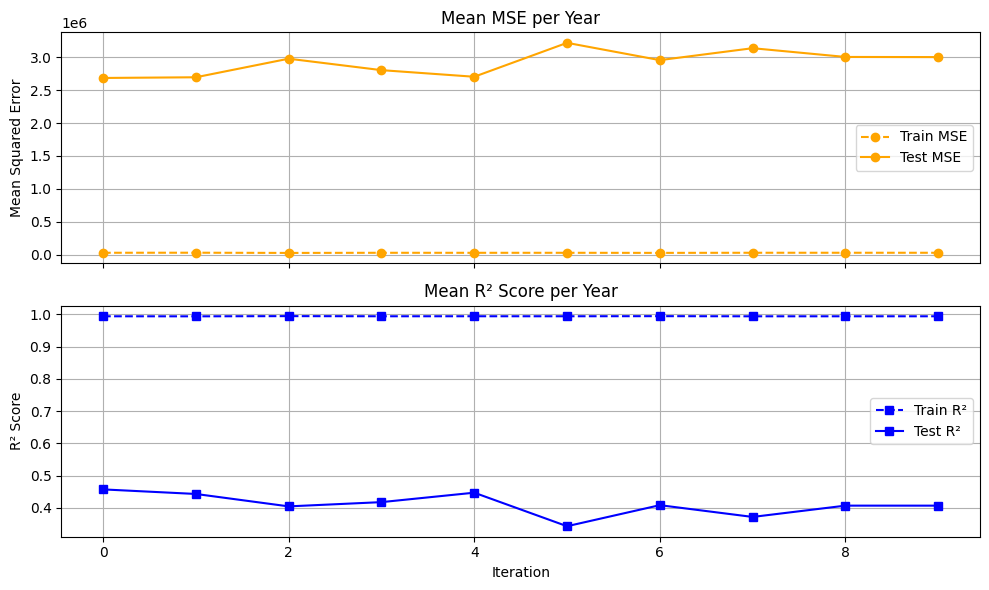

Mean R2 value (test): 0.4104513298211561


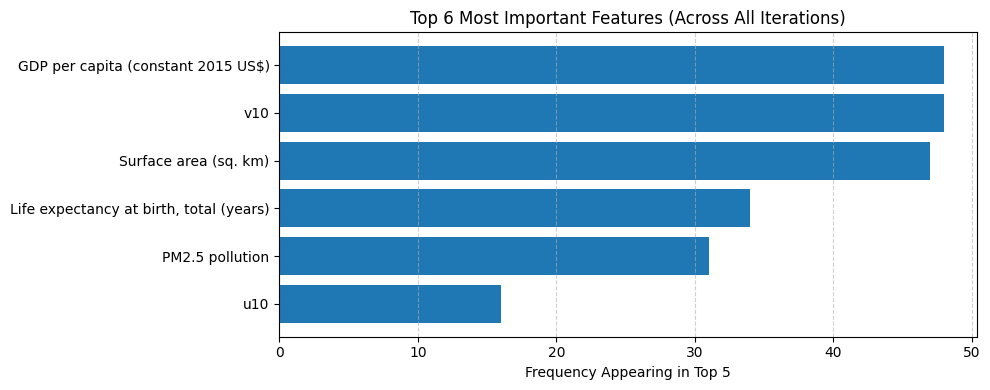

In [55]:
# training only on environmental factors

feature_columns = [
    'Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita)',
    'Renewable electricity output (% of total electricity output)',
    'CO2 emissions', 'Coal consumption', 'Energy use', 'Electricity use',
    'Raw materials extracted', 'Oil consumption', 'PM2.5 pollution'
]

target_column = "Value"  # asthma prevalence

train_test_lstm_country_cv(df_prepared, feature_columns, target_column,
                           n_splits=5, sequence_length=3, n_epochs=50)